In [107]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,SimpleRNN
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# LOAD THE DATA

In [10]:
train= pd.read_csv('dengue_features_train.csv')
test = pd.read_csv('dengue_features_test.csv')
labels= pd.read_csv('dengue_labels_train.csv')
sub= pd.read_csv('submission_format.csv')

In [11]:
labels_cpy = labels.copy()
labels_cpy.drop(['city','year','weekofyear'],axis=1,inplace=True)
labels_cpy.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [13]:
final_df = train.join(labels_cpy)
final_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [14]:
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [15]:

def get_data():
    #get train data
    train = pd.read_csv('dengue_features_train.csv')
    
    #get test data
    test = pd.read_csv('dengue_features_test.csv')
    
    return train , test


def get_combined_data():
  #reading train data
  train , test = get_data()

  target = final_df.total_cases
  final_df.drop(['total_cases'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index'], inplace=True, axis=1)
  return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

In [16]:
combined.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1867,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.40,9.050,32.6,21.8,33.0
1868,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.52,10.720,33.8,21.4,68.0
1869,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.20,10.075,32.6,21.6,93.2
1870,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.70,8.480,32.2,21.8,34.1
1871,iq,2013,26,2013-06-25,0.339467,0.240071,0.356943,0.273600,51.80,297.372857,...,27.80,87.030000,51.80,16.148571,11.542857,27.35,9.675,32.6,22.0,14.9


In [17]:
target.head()

0    4
1    5
2    4
3    3
4    6
Name: total_cases, dtype: int64

In [18]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [19]:

num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [20]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 2
Number of nun-numerical columns with no nan values : 2


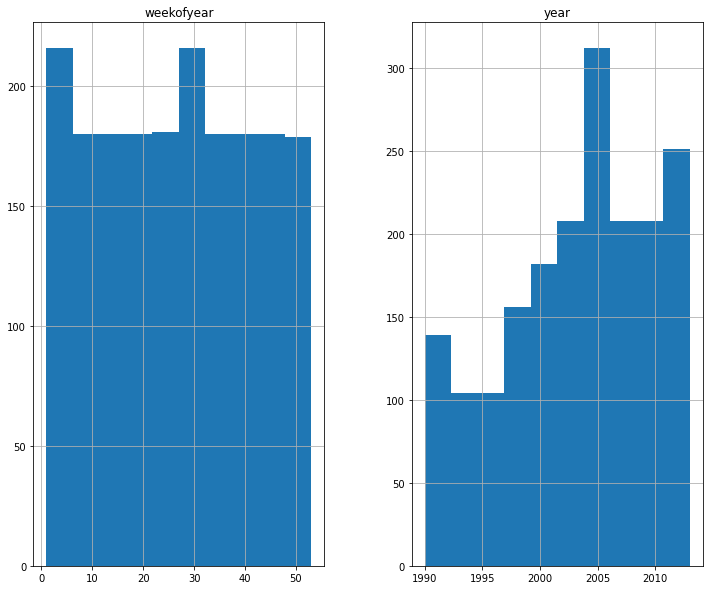

In [21]:
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

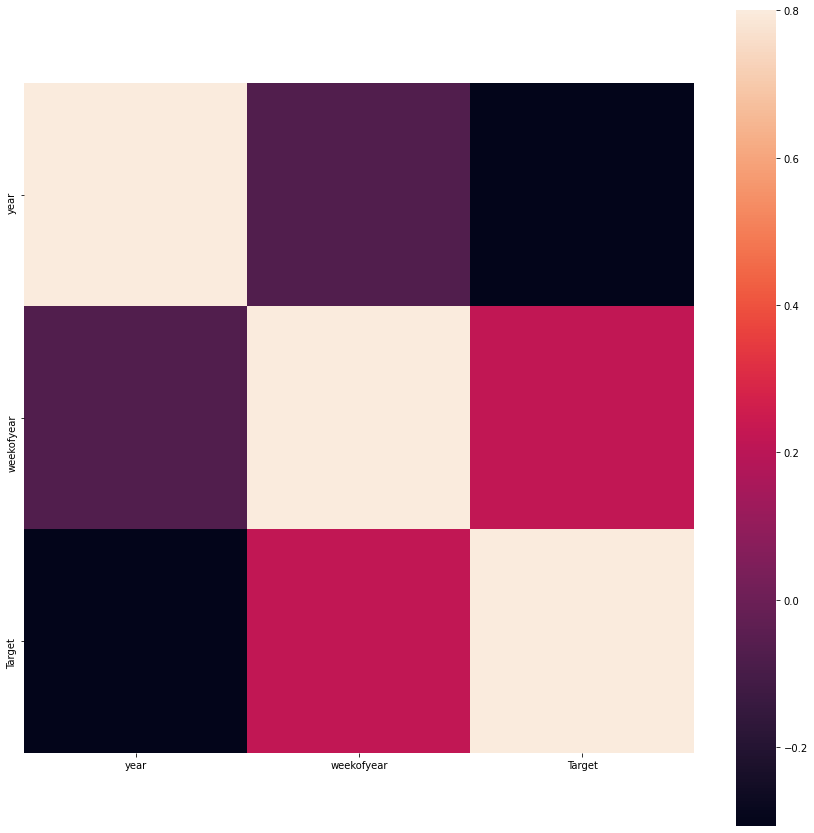

In [22]:
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [23]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 4 columns before encoding categorical features
There are 1209 columns after encoding categorical features


In [24]:
combined.shape

(1872, 1209)

In [25]:
def split_combined():
    global combined
    train = combined[:1456]
    test = combined[1456:]

    return train , test 
  
train, test = split_combined()

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit_transform(train)
scaler.transform(test)

array([[0.9       , 0.32692308, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.9       , 0.34615385, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.9       , 0.36538462, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.15      , 0.44230769, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.15      , 0.46153846, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.15      , 0.48076923, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [151]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1024,input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(1024,activation='relu'))
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(64,activation='relu'))
NN_model.add(Dense(64,activation='relu'))
NN_model.add(Dense(32,activation='relu'))
NN_model.add(Dense(32,activation='relu'))
NN_model.add(Dense(16,activation='relu'))
NN_model.add(Dense(16,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              1239040   
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_31 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 32)              

In [153]:
NN_model.fit(train, target, epochs=800, batch_size=32, validation_split = 0.2)

Train on 1164 samples, validate on 292 samples
Epoch 1/800
1164/1164 [==============================] - 0s 154us/sample - loss: 4.3464 - mean_absolute_error: 4.3464 - val_loss: 7.8775 - val_mean_absolute_error: 7.8775
Epoch 2/800
1164/1164 [==============================] - 0s 141us/sample - loss: 4.1458 - mean_absolute_error: 4.1458 - val_loss: 7.9063 - val_mean_absolute_error: 7.9063
Epoch 3/800
1164/1164 [==============================] - 0s 140us/sample - loss: 4.5117 - mean_absolute_error: 4.5117 - val_loss: 7.9559 - val_mean_absolute_error: 7.9559
Epoch 4/800
1164/1164 [==============================] - 0s 140us/sample - loss: 9.2129 - mean_absolute_error: 9.2129 - val_loss: 7.6202 - val_mean_absolute_error: 7.6202
Epoch 5/800
1164/1164 [==============================] - 0s 146us/sample - loss: 5.1974 - mean_absolute_error: 5.1974 - val_loss: 7.8511 - val_mean_absolute_error: 7.8511
Epoch 6/800
1164/1164 [==============================] - 0s 153us/sample - loss: 4.0247 - mean_abs

In [32]:
print(type(train_rnn))

<class 'numpy.ndarray'>


In [33]:
train_rnn = train_rnn.reshape(1,train_rnn.shape[0],train_rnn.shape[1])

In [34]:
train_rnn.shape

(1, 1456, 1209)

In [43]:
RNN_model = Sequential()

# The Input Layer :
RNN_model.add(LSTM(1209, kernel_initializer='normal',return_sequences=True,input_shape= (1456,1209)))

# The Hidden Layers :
RNN_model.add(LSTM(120))



# The Output Layer :
RNN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
RNN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
RNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 1456, 1209)        11698284  
_________________________________________________________________
lstm_15 (LSTM)               (None, 120)               638400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 121       
Total params: 12,336,805
Trainable params: 12,336,805
Non-trainable params: 0
_________________________________________________________________


In [45]:
print(type(target))

<class 'pandas.core.series.Series'>


In [89]:
target.shape

(1456,)

In [90]:
target_rnn = target.values.copy()

In [91]:
print(type(target_rnn))

<class 'numpy.ndarray'>


In [93]:
target_rnn.shape

(1456,)

In [94]:
train_rnn.shape

(1, 1456, 1209)

In [95]:
target_rnn = target_rnn.reshape(1,target_rnn.shape[0],1)

In [97]:
target_rnn.shape

(1, 1456, 1)

In [98]:
RNN_model.fit(train_rnn, target_rnn, epochs=100, validation_split = 0.2)

Epoch 1/100


OverflowError: cannot convert float infinity to integer

In [85]:
sub.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [86]:
test.head()

,year,weekofyear,city_iq,city_sj,week_start_date_1990-04-30,week_start_date_1990-05-07,week_start_date_1990-05-14,week_start_date_1990-05-21,week_start_date_1990-05-28,week_start_date_1990-06-04,...,week_start_date_2013-04-23,week_start_date_2013-04-30,week_start_date_2013-05-07,week_start_date_2013-05-14,week_start_date_2013-05-21,week_start_date_2013-05-28,week_start_date_2013-06-04,week_start_date_2013-06-11,week_start_date_2013-06-18,week_start_date_2013-06-25
1456,2008,18,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,2008,19,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,2008,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,2008,21,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,2008,22,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
test_cpy = pd.read_csv('dengue_features_test.csv')

In [88]:
test_cpy.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


# Simple RNN

In [109]:
train.shape

(1456, 1209)

In [121]:
model = Sequential()
model.add(SimpleRNN(units=286, input_shape=(1456,1209), activation="tanh"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_12 (SimpleRNN)    (None, 286)               427856    
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 2296      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 9         
Total params: 430,161
Trainable params: 430,161
Non-trainable params: 0
_________________________________________________________________


In [123]:
target_rnn.shape

(1, 1456, 1)

In [146]:
targ = target.values.copy()

In [147]:
targ.shape

(1456,)

In [148]:
targ = targ.reshape(1,targ.shape[0],1)

In [149]:
targ.shape

(1, 1456, 1)

In [136]:
train_rnn.shape

(1, 1456, 1209)

In [137]:
trai = train.values.copy()


In [138]:
trai.shape

(1456, 1209)

In [150]:
model.fit(train_rnn, targ, epochs=500, batch_size=32, validation_split = 0.2)

ValueError: A target array with shape (1, 1456, 1) was passed for an output of shape (None, 1) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [154]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'city':pd.read_csv('dengue_features_test.csv').city,
                                'year':pd.read_csv('dengue_features_test.csv').year,
                                'weekofyear':pd.read_csv('dengue_features_test.csv').weekofyear,
                                'total_cases':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

predictions = NN_model.predict(test).astype('int64')
make_submission(predictions[:,0],'dnn2_submission.csv')

A submission file has been made
